<a href="https://colab.research.google.com/github/bdfd/Section6.Project03-_Flight_Fare_Prediction/blob/main/2.0%20colab/S603_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Price Prediction

## Exploratory Data Analysis

The Background Introduction  
Analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it.'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Multivariate Linear Regression

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
4 non-binary categorical features: Airline, Source, Destination, Total_Stops  
4 continuous features: Date_of_Journey, Dep_Time, Arrivial_Time, Duration  
2 possible drop feature: Route, Additional_Info  
1 target variable: Price  

In [ ]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [ ]:
#Code to verify the package installation
try:
  import tqdm
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [ ]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [ ]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [ ]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [ ]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [ ]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [ ]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction


## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Drop NaN values using dropna() method
4. Describe data --> which can give statistical analysis

In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
# data_dir = 'https://raw.githubusercontent.com/bdfd/Project_03-Social_Network_Ads/main/dataset/'
dataset_url_1 = 'S603_EDA_Dataset.csv'
dataset_url_2 = 'S603_EDA_Dataset.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(result_dir,dataset_url_1))
df2 = pd.read_csv(os.path.join(result_dir,dataset_url_2))
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Dep_Weekday,Dep_Interval,Arrival_Interval,Duration(mins)
0,IndiGo,Banglore,New Delhi,0,3897,Sunday,Midnight,Midnight,170
1,Air India,Kolkata,Banglore,2,7662,Wednesday,Before Dawn,Noon,445
2,Jet Airways,Delhi,Cochin,2,13882,Sunday,Morning,Before Dawn,1140


In [ ]:
target_feature = 'Price'

In [ ]:
print(f'the dataset_1 size is {df.shape} and target feature is {target_feature}')

the dataset_1 size is (10672, 9) and target feature is Price


In [ ]:
# Check column name and categories
df.columns.values

array(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Dep_Weekday', 'Dep_Interval', 'Arrival_Interval',
       'Duration(mins)'], dtype=object)

In [ ]:
df.nunique()

Airline                9
Source                 5
Destination            6
Total_Stops            5
Price               1860
Dep_Weekday            7
Dep_Interval           6
Arrival_Interval       6
Duration(mins)       368
dtype: int64

In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10672 entries, 0 to 10671
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10672 non-null  object
 1   Source            10672 non-null  object
 2   Destination       10672 non-null  object
 3   Total_Stops       10672 non-null  int64 
 4   Price             10672 non-null  int64 
 5   Dep_Weekday       10672 non-null  object
 6   Dep_Interval      10672 non-null  object
 7   Arrival_Interval  10672 non-null  object
 8   Duration(mins)    10672 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 750.5+ KB


Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Dep_Weekday         0
Dep_Interval        0
Arrival_Interval    0
Duration(mins)      0
dtype: int64

In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Price                int64
Dep_Weekday         object
Dep_Interval        object
Arrival_Interval    object
Duration(mins)       int64
dtype: object

In [ ]:
df.describe()

,Total_Stops,Price,Duration(mins)
count,10672.000000,10672.000000,10672.000000
mean,0.824119,9060.011900,643.344265
std,0.675201,4455.657186,507.942303
min,0.000000,1759.000000,5.000000
25%,0.000000,5276.750000,170.000000
50%,1.000000,8372.000000,520.000000
75%,1.000000,12373.000000,930.000000
max,4.000000,54826.000000,2860.000000


Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


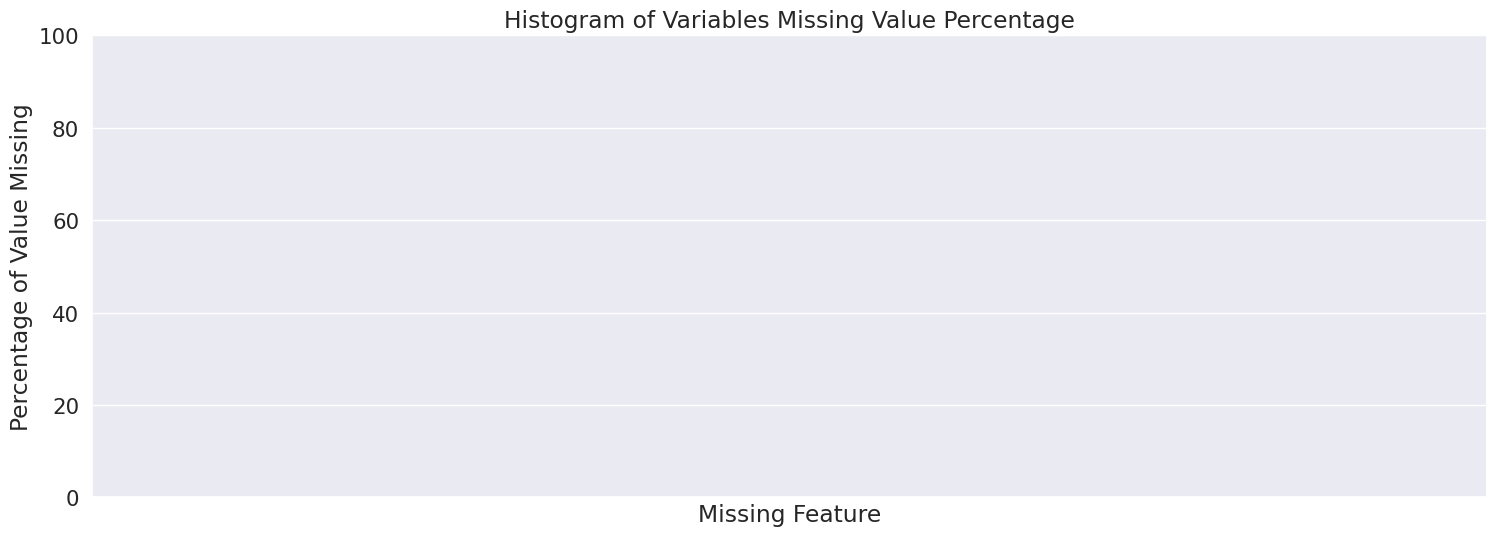

Empty DataFrame
Columns: [index, Miss_Values, Miss_Rate, Available_Value]
Index: []


[]

In [ ]:
exe.graph.missing_value_analysis(df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(10672, 9)

In [ ]:
# list of numerical variables
numerical_features = exe.eda.numerical_features_list(df)
numerical_features

Number of Numerical Variables: 3
   Total_Stops  Price  Duration(mins)
0            0   3897             170
1            2   7662             445
2            2  13882            1140
3            1   6218             325
4            1  13302             285


['Total_Stops', 'Price', 'Duration(mins)']

In [ ]:
num_features = exe.eda.column_identify(df,numerical_features)
num_features

{'Total_Stops': 5, 'Price': 1860, 'Duration(mins)': 368}

In [ ]:
# list of categorical_features
categorical_features = exe.eda.categorical_features_list(df)
categorical_features

Number of Categorical Variables: 6
       Airline    Source Destination Dep_Weekday Dep_Interval Arrival_Interval
0       IndiGo  Banglore   New Delhi      Sunday     Midnight         Midnight
1    Air India   Kolkata    Banglore   Wednesday  Before Dawn             Noon
2  Jet Airways     Delhi      Cochin      Sunday      Morning      Before Dawn
3       IndiGo   Kolkata    Banglore      Sunday      Evening         Midnight
4       IndiGo  Banglore   New Delhi      Friday    Afternoon          Evening


['Airline',
 'Source',
 'Destination',
 'Dep_Weekday',
 'Dep_Interval',
 'Arrival_Interval']

In [ ]:
cat_features = exe.eda.column_identify(df,categorical_features)
cat_features

{'Airline': 9,
 'Source': 5,
 'Destination': 6,
 'Dep_Weekday': 7,
 'Dep_Interval': 6,
 'Arrival_Interval': 6}

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 2126, (19.9%)



## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [ ]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

In [ ]:
# Select columns to one-hot encode
categorical_features

['Airline',
 'Source',
 'Destination',
 'Dep_Weekday',
 'Dep_Interval',
 'Arrival_Interval']

In [ ]:
# Fit and transform the selected columns
ohe = exe.eda.fit_one_hot_encode(df, categorical_features)

In [ ]:
# Create a DataFrame with the encoded columns and their names
df_transformed = exe.eda.transform_one_hot_encode(df, categorical_features, ohe)
df_transformed

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,...,Dep_Interval_Evening,Dep_Interval_Midnight,Dep_Interval_Morning,Dep_Interval_Noon,Arrival_Interval_Afternoon,Arrival_Interval_Before Dawn,Arrival_Interval_Evening,Arrival_Interval_Midnight,Arrival_Interval_Morning,Arrival_Interval_Noon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
result_df = exe.format.concat_transformed_df(df, df_transformed, categorical_features)
result_df

,Total_Stops,Price,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Dep_Interval_Evening,Dep_Interval_Midnight,Dep_Interval_Morning,Dep_Interval_Noon,Arrival_Interval_Afternoon,Arrival_Interval_Before Dawn,Arrival_Interval_Evening,Arrival_Interval_Midnight,Arrival_Interval_Morning,Arrival_Interval_Noon
0,0,3897,170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,7662,445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,13882,1140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,13302,285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,0,4107,150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10668,0,4145,155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10669,0,7229,180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10670,0,12648,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Inverse transform to revert back to the original form
df_inverse_transformed = exe.eda.inverse_one_hot_encode(df_transformed, categorical_features, ohe)
df_inverse_transformed

,Airline,Source,Destination,Dep_Weekday,Dep_Interval,Arrival_Interval
0,IndiGo,Banglore,New Delhi,Sunday,Midnight,Midnight
1,Air India,Kolkata,Banglore,Wednesday,Before Dawn,Noon
2,Jet Airways,Delhi,Cochin,Sunday,Morning,Before Dawn
3,IndiGo,Kolkata,Banglore,Sunday,Evening,Midnight
4,IndiGo,Banglore,New Delhi,Friday,Afternoon,Evening
...,...,...,...,...,...,...
10667,Air Asia,Kolkata,Banglore,Tuesday,Evening,Midnight
10668,Air India,Kolkata,Banglore,Saturday,Evening,Midnight
10669,Jet Airways,Banglore,Delhi,Saturday,Morning,Noon
10670,Vistara,Banglore,New Delhi,Friday,Noon,Afternoon


In [ ]:
df_result_after_inverse = exe.format.concat_inversed_df(result_df, df_inverse_transformed, df_transformed)
df_result_after_inverse

,Total_Stops,Price,Duration(mins),Airline,Source,Destination,Dep_Weekday,Dep_Interval,Arrival_Interval
0,0,3897,170,IndiGo,Banglore,New Delhi,Sunday,Midnight,Midnight
1,2,7662,445,Air India,Kolkata,Banglore,Wednesday,Before Dawn,Noon
2,2,13882,1140,Jet Airways,Delhi,Cochin,Sunday,Morning,Before Dawn
3,1,6218,325,IndiGo,Kolkata,Banglore,Sunday,Evening,Midnight
4,1,13302,285,IndiGo,Banglore,New Delhi,Friday,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...
10667,0,4107,150,Air Asia,Kolkata,Banglore,Tuesday,Evening,Midnight
10668,0,4145,155,Air India,Kolkata,Banglore,Saturday,Evening,Midnight
10669,0,7229,180,Jet Airways,Banglore,Delhi,Saturday,Morning,Noon
10670,0,12648,160,Vistara,Banglore,New Delhi,Friday,Noon,Afternoon


In [ ]:
result_df

,Total_Stops,Price,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Dep_Interval_Evening,Dep_Interval_Midnight,Dep_Interval_Morning,Dep_Interval_Noon,Arrival_Interval_Afternoon,Arrival_Interval_Before Dawn,Arrival_Interval_Evening,Arrival_Interval_Midnight,Arrival_Interval_Morning,Arrival_Interval_Noon
0,0,3897,170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,7662,445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,13882,1140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,13302,285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,0,4107,150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10668,0,4145,155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10669,0,7229,180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10670,0,12648,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


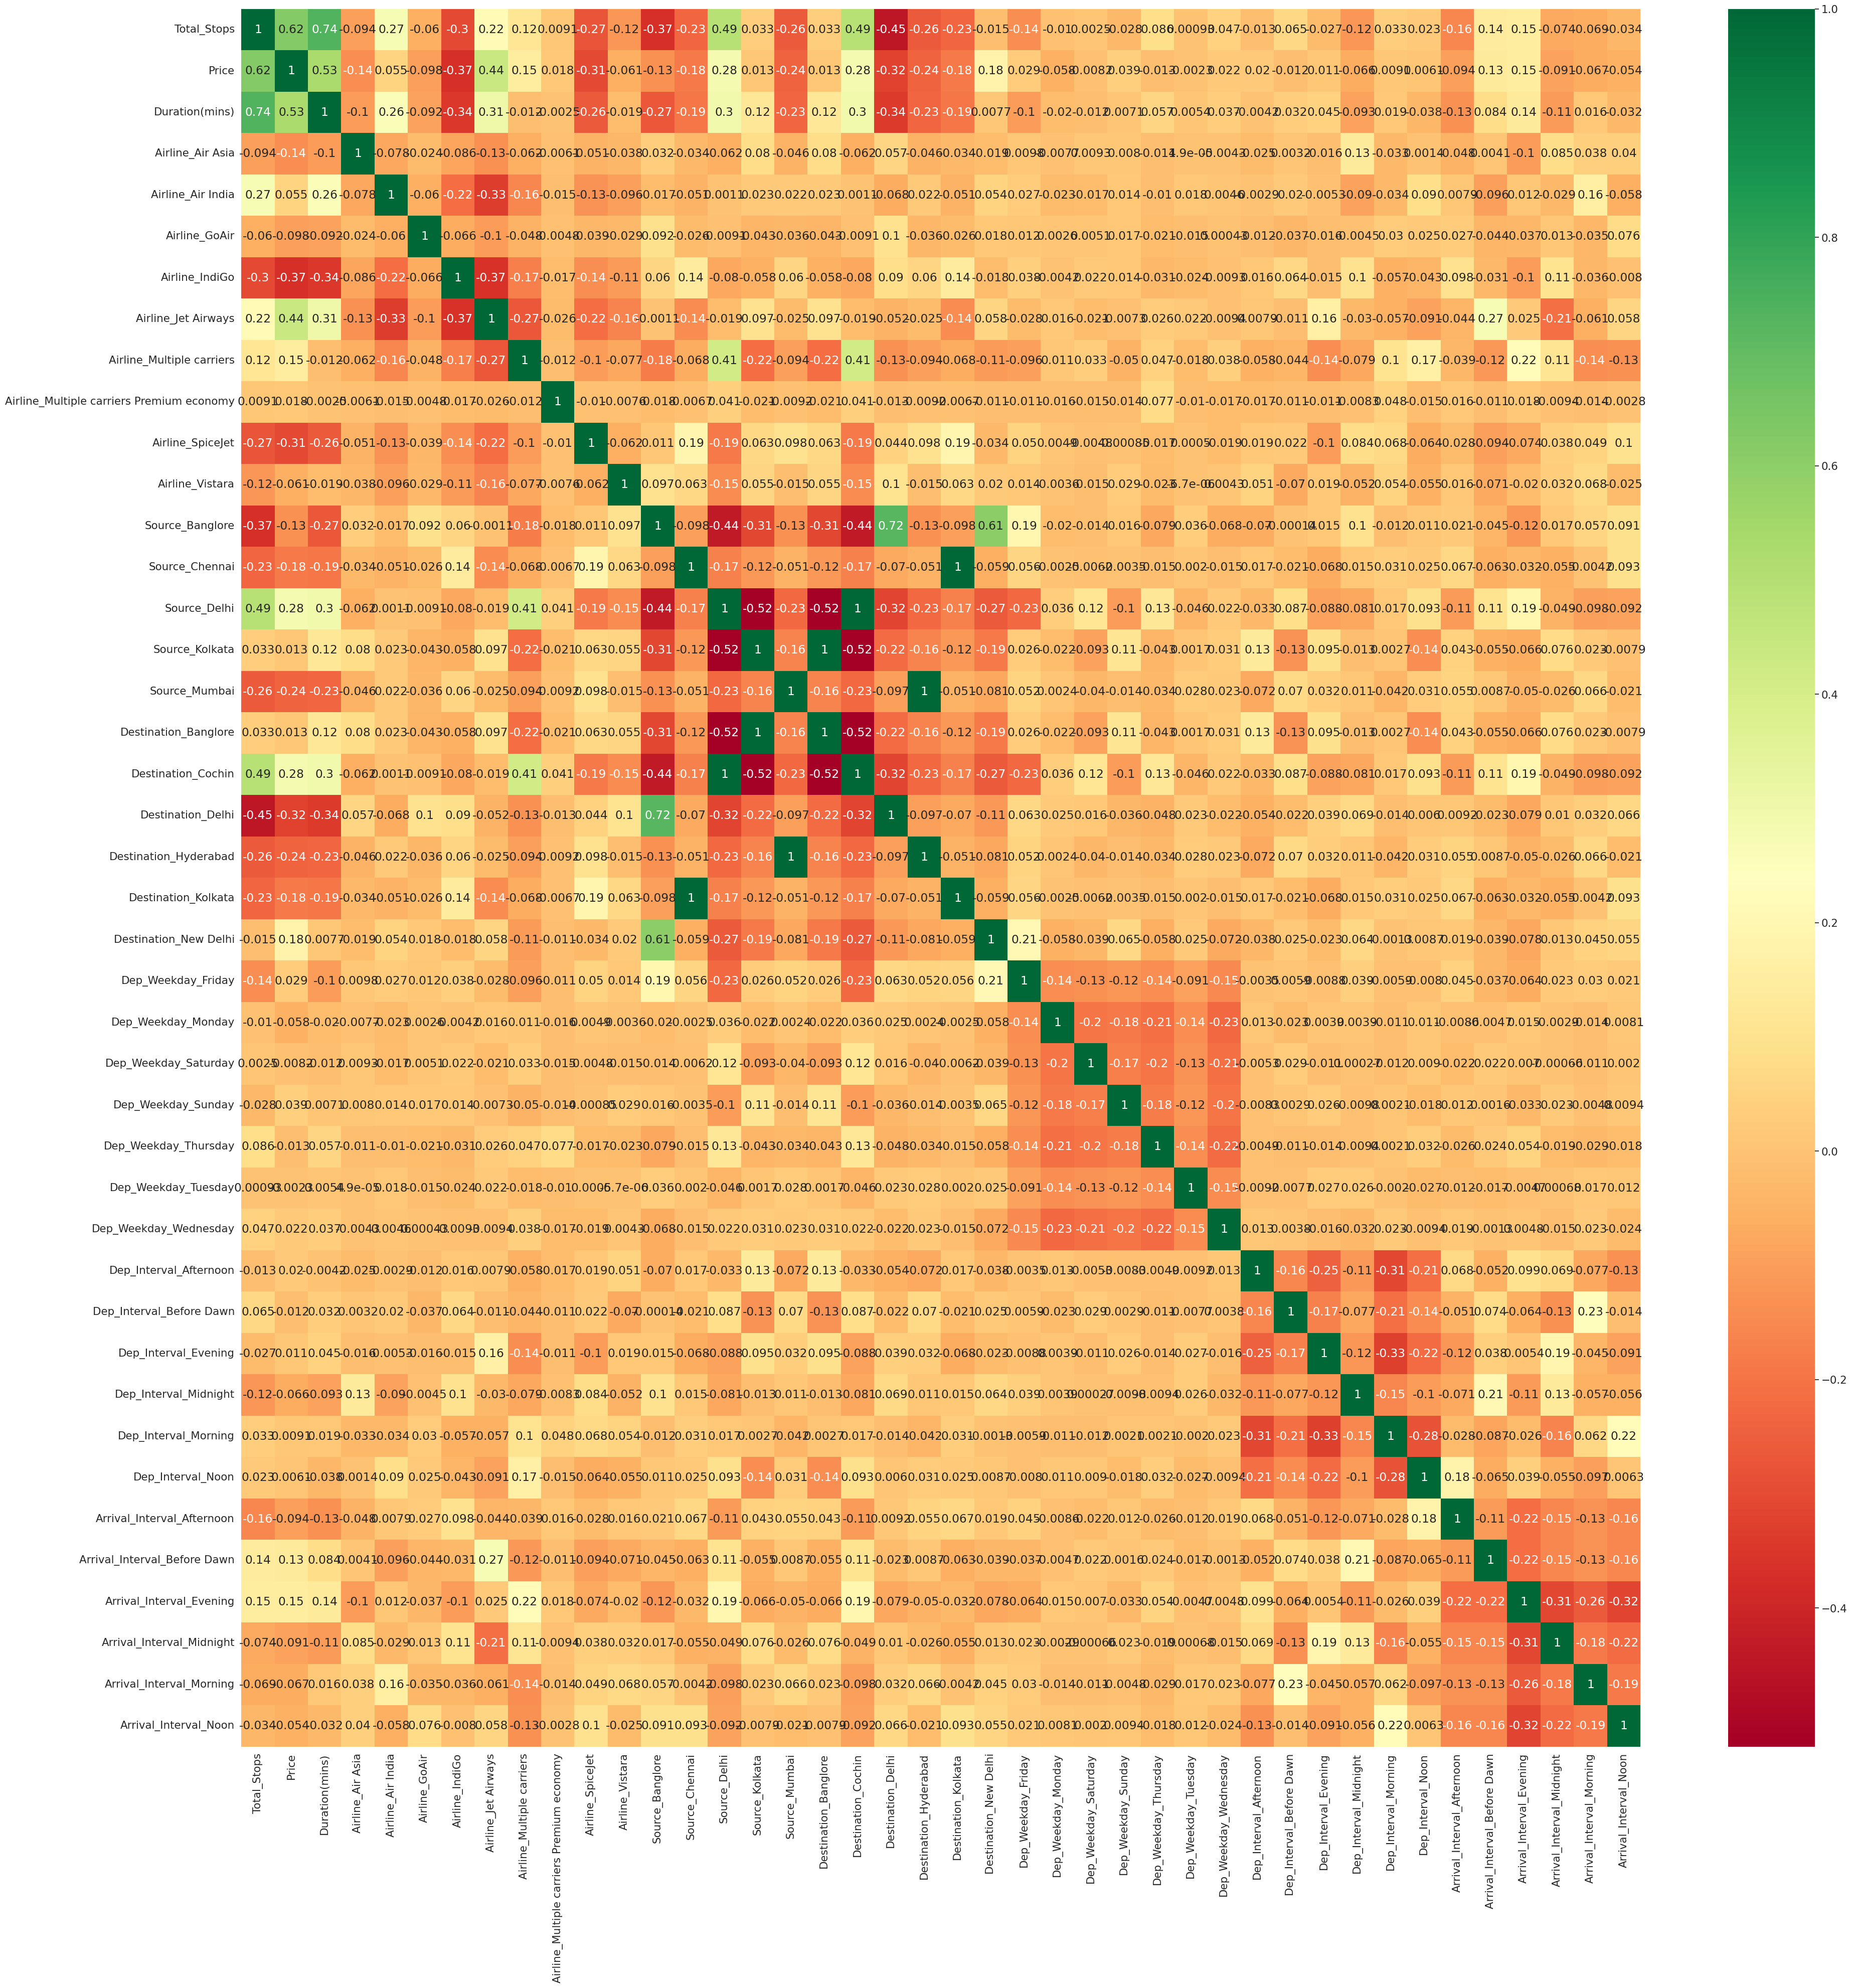

In [ ]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (45,45))
sns.heatmap(result_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

Feature Correlations (sorted by absolute values):
Top 10 feature and target feature list: ['Total_Stops', 'Duration(mins)', 'Airline_Jet Airways', 'Airline_IndiGo', 'Destination_Delhi', 'Airline_SpiceJet', 'Source_Delhi', 'Destination_Cochin', 'Source_Mumbai', 'Destination_Hyderabad', 'Source_Chennai', 'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Multiple carriers', 'Arrival_Interval_Evening', 'Airline_Air Asia', 'Source_Banglore', 'Arrival_Interval_Before Dawn', 'Airline_GoAir', 'Arrival_Interval_Afternoon', 'Price']
| Feature                      |   Abs Cor |
|------------------------------|-----------|
| Total_Stops                  |      0.62 |
| Duration(mins)               |      0.53 |
| Airline_Jet Airways          |      0.44 |
| Airline_IndiGo               |     -0.37 |
| Destination_Delhi            |     -0.32 |
| Airline_SpiceJet             |     -0.31 |
| Source_Delhi                 |      0.28 |
| Destination_Cochin           |      0.28 |
| Source_Mumba

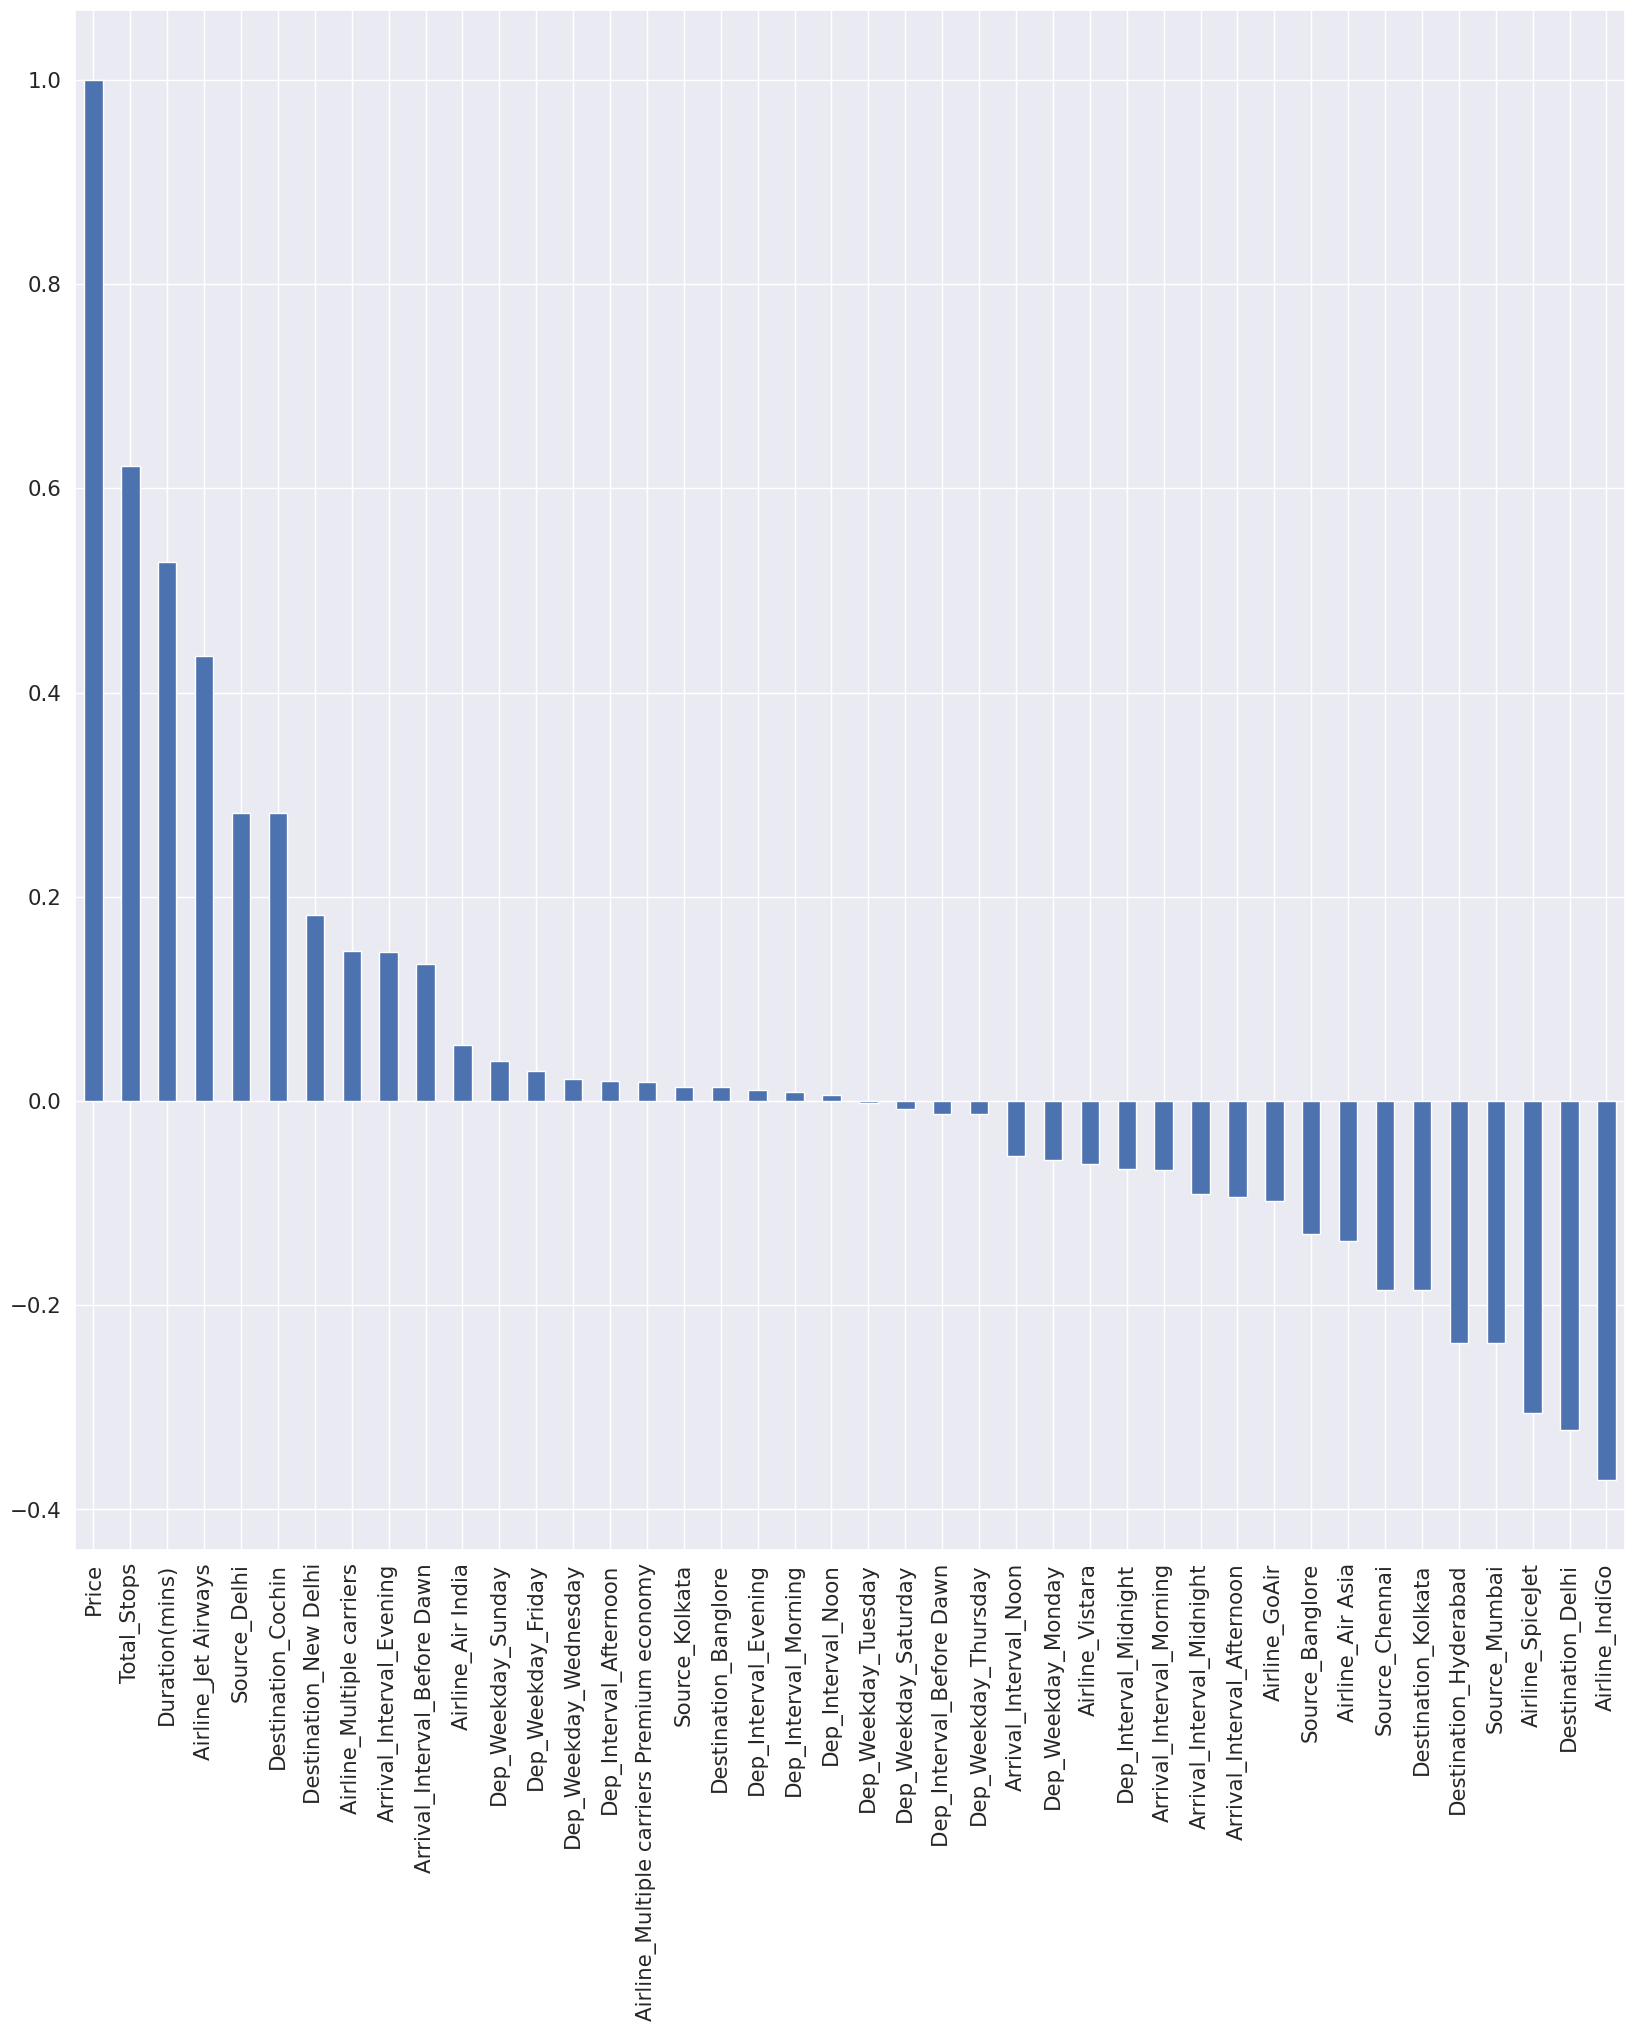

In [ ]:
#Get Correlation of "Churn" with other variables:
# plt.figure(figsize=(15,8))
# result_df.corr()[target_feature].sort_values(ascending = False).plot(kind='bar')
top_feature_number = 20
top_features = exe.graph.top_correlation(result_df,target_feature,top_feature_number)

## Model Selection

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [ ]:
X_train, X_test, y_train, y_test = exe.eda.sep_split(result_df, target_feature)

In [ ]:
X_train

,Total_Stops,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Dep_Interval_Evening,Dep_Interval_Midnight,Dep_Interval_Morning,Dep_Interval_Noon,Arrival_Interval_Afternoon,Arrival_Interval_Before Dawn,Arrival_Interval_Evening,Arrival_Interval_Midnight,Arrival_Interval_Morning,Arrival_Interval_Noon
1358,2,1375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9417,1,845,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10493,1,870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9106,1,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8231,2,810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,0,180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8243,1,520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8823,1,470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9020,1,780,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
Rf_reg = RandomForestRegressor()
Rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = Rf_reg.predict(X_test)

In [ ]:
Rf_reg.score(X_train, y_train)

0.8708326708775859

In [ ]:
Rf_reg.score(X_test, y_test)

0.6351761058932013

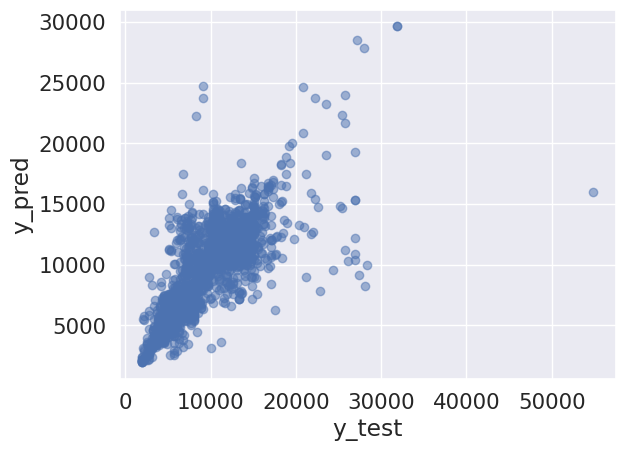

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [ ]:
lr = LinearRegression()

Train score : 0.6
Test score : 0.57
Train CV scores : [0.5539681  0.58771366 0.58707105 0.60841345 0.63322746]
Train CV mean : 0.59
Mean absolute error for train : 1964.9353906425265
Median absolute error for train : 1450.4592044894162
Mean absolute error for test : 2022.2350636334893
Median absolute error for test : 2022.2350636334893


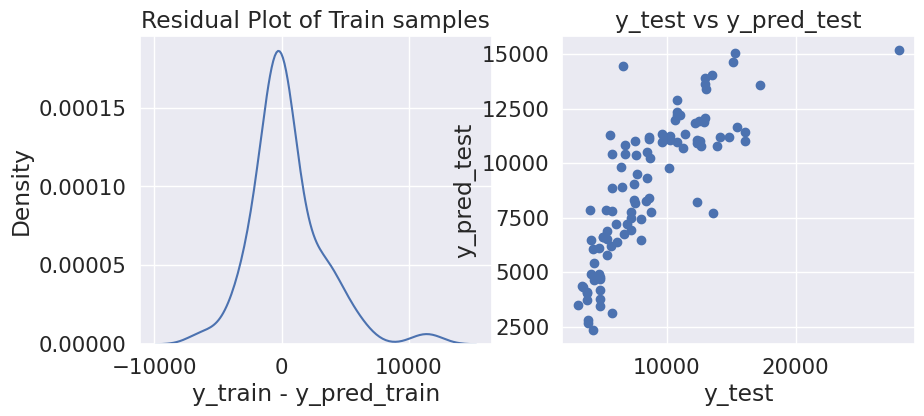

In [ ]:
exe.model.reg_model(lr, X_train, y_train, X_test, y_test)

In [ ]:
# Creating Ridge model object
SGDR = SGDRegressor()
dic = {
    "penalty": ['l2', 'l1', 'elasticnet'],
    "loss": ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
}

In [ ]:
SGDR_rs = GridSearchCV(estimator = SGDR, param_grid=dic)

In [ ]:
exe.model.reg_model(SGDR_rs, X_train, y_train, X_test, y_test)

In [ ]:
rf = RandomForestRegressor(max_depth=50,min_samples_split=20,n_estimators=100)

In [ ]:
exe.model.reg_model(rf, X_train, y_train, X_test, y_test)

In [ ]:
xg = XGBRegressor()

In [ ]:
exe.model.reg_model(xg, X_train, y_train, X_test, y_test)

In [ ]:
cb = CatBoostRegressor()

In [ ]:
exe.model.reg_model(cb, X_train, y_train, X_test, y_test)